# WeatherPy
----

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
cloudiness = []
country = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
city_num = 1
city_name = []

print("Beginning Data Retrieval")
print("---------------------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        cloudiness.append(response['clouds']['all']) 
        country.append(response['sys']['country'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        city_name.append(city)
        print(f"Processing Record {city_num} | City: {city}")
        city_num += 1
    except:
        print(f"City {city} not found. Skipping...")
        pass

Beginning Data Retrieval
---------------------------------------
Processing Record 1 | City: busselton
Processing Record 2 | City: mataura
Processing Record 3 | City: butaritari
Processing Record 4 | City: mangai
Processing Record 5 | City: delmas
Processing Record 6 | City: saint-philippe
Processing Record 7 | City: tasiilaq
Processing Record 8 | City: asosa
Processing Record 9 | City: sirjan
Processing Record 10 | City: husavik
Processing Record 11 | City: puerto ayora
Processing Record 12 | City: minab
Processing Record 13 | City: were ilu
Processing Record 14 | City: faanui
Processing Record 15 | City: qaanaaq
City tsihombe not found. Skipping...
Processing Record 16 | City: port elizabeth
Processing Record 17 | City: saint george
Processing Record 18 | City: atuona
Processing Record 19 | City: kangaatsiaq
Processing Record 20 | City: morondava
Processing Record 21 | City: beyneu
Processing Record 22 | City: rikitea
Processing Record 23 | City: vaini
Processing Record 24 | City: us

City azimur not found. Skipping...
Processing Record 197 | City: mbuji-mayi
Processing Record 198 | City: sao joao da barra
Processing Record 199 | City: mehriz
Processing Record 200 | City: sahuaripa
Processing Record 201 | City: flinders
Processing Record 202 | City: kruisfontein
Processing Record 203 | City: itarema
Processing Record 204 | City: avarua
City saleaula not found. Skipping...
Processing Record 205 | City: sturgeon bay
Processing Record 206 | City: san pedro
Processing Record 207 | City: shirokiy
Processing Record 208 | City: flin flon
Processing Record 209 | City: odweyne
Processing Record 210 | City: mirabad
Processing Record 211 | City: amot
Processing Record 212 | City: beloha
Processing Record 213 | City: longyearbyen
Processing Record 214 | City: northam
Processing Record 215 | City: sitka
Processing Record 216 | City: havre-saint-pierre
Processing Record 217 | City: mmabatho
Processing Record 218 | City: georgetown
Processing Record 219 | City: tarbes
City attawap

Processing Record 392 | City: firminy
City yunjinghong not found. Skipping...
Processing Record 393 | City: san cristobal
Processing Record 394 | City: nyurba
Processing Record 395 | City: khatanga
Processing Record 396 | City: taltal
Processing Record 397 | City: meiganga
Processing Record 398 | City: vila velha
Processing Record 399 | City: porto velho
Processing Record 400 | City: petropavlovsk-kamchatskiy
Processing Record 401 | City: byron bay
Processing Record 402 | City: santa maria
Processing Record 403 | City: rocha
Processing Record 404 | City: formosa
Processing Record 405 | City: sistranda
City yanchukan not found. Skipping...
Processing Record 406 | City: vostochnyy
Processing Record 407 | City: sorland
Processing Record 408 | City: caravelas
City samusu not found. Skipping...
Processing Record 409 | City: cumberland
Processing Record 410 | City: mitchell
Processing Record 411 | City: egvekinot
Processing Record 412 | City: itoman
Processing Record 413 | City: yarmouth
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
cities_dict = {'City': city_name, 'Lat': lat, 'Lng': lng, 'Max Temp': max_temp, 'Humidity': humidity, 
               'Cloudiness': cloudiness, 'Wind Speed': wind_speed, 'Country': country}
cities_df = pd.DataFrame.from_dict(cities_dict)
cities_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
dtype: int64

In [7]:
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,busselton,-33.65,115.33,16.67,78,100,10.59,AU
1,mataura,-46.19,168.86,7.22,72,99,4.92,NZ
2,butaritari,3.07,172.79,28.61,72,19,4.90,KI
3,mangai,-4.05,19.53,26.57,52,65,0.61,CD
4,delmas,-26.15,28.68,16.00,51,0,3.60,ZA


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,18.379667,15.597163,19.816988,70.367776,50.395797,3.664571
std,33.509762,90.718527,8.665543,22.410632,38.737953,2.584799
min,-54.800000,-179.170000,-2.330000,1.000000,0.000000,0.090000
25%,-9.415000,-58.935000,13.000000,58.000000,7.500000,1.790000
50%,21.390000,17.990000,21.000000,76.000000,51.000000,3.100000
75%,45.355000,92.890000,26.000000,88.000000,90.000000,5.090000
max,78.220000,179.320000,47.000000,100.000000,100.000000,17.140000


In [21]:
#  Get the indices of cities that have humidity over 100%.
high_humidity_df = pd.DataFrame(cities_df[cities_df['Humidity'] >= 100]['City'])
high_humidity_df['Humidity'] = cities_df[cities_df['Humidity'] >= 100]['Humidity']
high_humidity_df.head()

,City,Humidity
49,deloraine,100
85,arvika,100
86,gunjur,100
147,rypefjord,100
148,razdolnoye,100


## Since we don't have cities with humidity levels above 100%, the DataFrame remains without changes

In [20]:
# Export the City_Data into a csv
csv_path = "../output_data/cities.csv"
cities_df.to_csv(csv_path)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

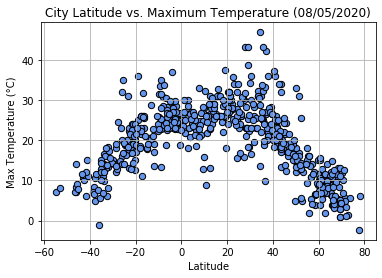

In [83]:
ax1 = cities_df.plot.scatter(x = 'Lat',
                             y = 'Max Temp',
                             title = 'City Latitude vs. Maximum Temperature (08/05/2020)',
                             c = 'cornflowerblue',
                             s = 40,
                             edgecolors = 'black',
                             grid = True)
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Max Temperature (°C)")
plt.show()

## Latitude vs. Humidity Plot

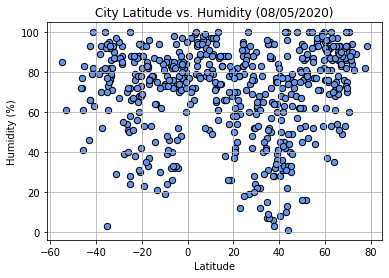

In [53]:
ax2 = cities_df.plot.scatter(x = 'Lat',
                             y = 'Humidity',
                             title = 'City Latitude vs. Humidity (08/05/2020)',
                             c = 'cornflowerblue',
                             s = 40,
                             edgecolors = 'black',
                             grid = True)
ax2.set_xlabel("Latitude")
ax2.set_ylabel("Humidity (%)")
plt.show()

## Latitude vs. Cloudiness Plot

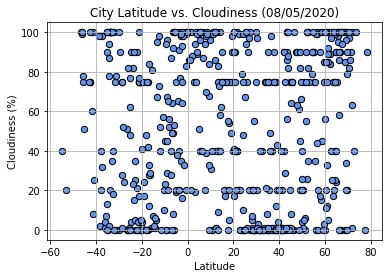

In [54]:
ax3 = cities_df.plot.scatter(x = 'Lat',
                             y = 'Cloudiness',
                             title = 'City Latitude vs. Cloudiness (08/05/2020)',
                             c = 'cornflowerblue',
                             s = 40,
                             edgecolors = 'black',
                             grid = True)
ax3.set_xlabel("Latitude")
ax3.set_ylabel("Cloudiness (%)")
plt.show()

## Latitude vs. Wind Speed Plot

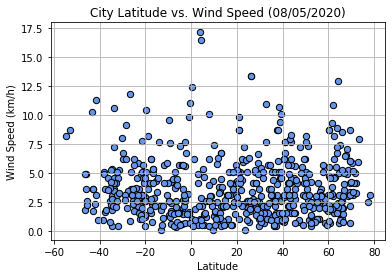

In [55]:
ax4 = cities_df.plot.scatter(x = 'Lat',
                             y = 'Wind Speed',
                             title = 'City Latitude vs. Wind Speed (08/05/2020)',
                             c = 'cornflowerblue',
                             s = 40,
                             edgecolors = 'black',
                             grid = True)
ax4.set_xlabel("Latitude")
ax4.set_ylabel("Wind Speed (km/h)")
plt.show()

## Linear Regression

In [122]:
# OPTIONAL: Create a function to create Linear Regression plots
def regression_plot(x_values, y_values, title, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-squared is: {rvalue**2}")
    plt.scatter(x_values,y_values, color='cornflowerblue', edgecolors='black')
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid()
    plt.show()

In [59]:
# Create Northern and Southern Hemisphere DataFrames
northern_hem_df = pd.DataFrame(cities_df[cities_df['Lat'] >= 0])
southern_hem_df = pd.DataFrame(cities_df[cities_df['Lat'] < 0])

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.543660936569952


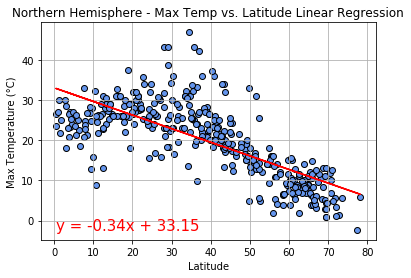

In [123]:
title = 'Northern Hemisphere - Max Temp vs. Latitude Linear Regression'
x_label = 'Latitude'
y_label = 'Max Temperature (°C)'
regression_plot(northern_hem_df['Lat'], northern_hem_df['Max Temp'], title, x_label, y_label)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6125830054916923


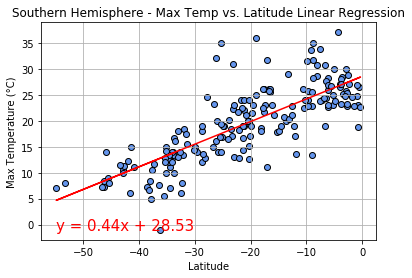

In [124]:
title = 'Southern Hemisphere - Max Temp vs. Latitude Linear Regression'
x_label = 'Latitude'
y_label = 'Max Temperature (°C)'
regression_plot(southern_hem_df['Lat'], southern_hem_df['Max Temp'], title, x_label, y_label)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.004868400466526099


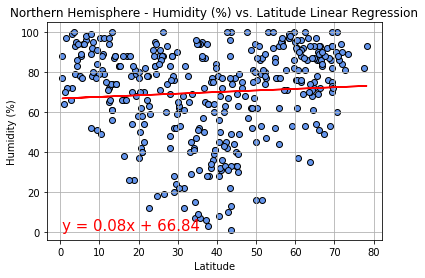

In [125]:
title = 'Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression'
x_label = 'Latitude'
y_label = 'Humidity (%)'
regression_plot(northern_hem_df['Lat'], northern_hem_df['Humidity'], title, x_label, y_label)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.014895304141592155


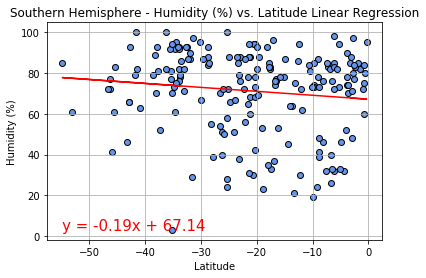

In [126]:
title = 'Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression'
x_label = 'Latitude'
y_label = 'Humidity (%)'
regression_plot(southern_hem_df['Lat'], southern_hem_df['Humidity'], title, x_label, y_label)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0027227341450260178


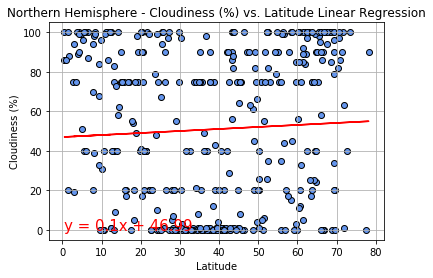

In [127]:
title = 'Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression'
x_label = 'Latitude'
y_label = 'Cloudiness (%)'
regression_plot(northern_hem_df['Lat'], northern_hem_df['Cloudiness'], title, x_label, y_label)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0009332883461345671


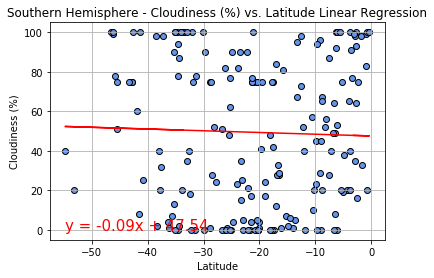

In [128]:
title = 'Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression'
x_label = 'Latitude'
y_label = 'Cloudiness (%)'
regression_plot(southern_hem_df['Lat'], southern_hem_df['Cloudiness'], title, x_label, y_label)

####  Northern Hemisphere - Wind Speed (km/h) vs. Latitude Linear Regression

The r-squared is: 0.002827860655292106


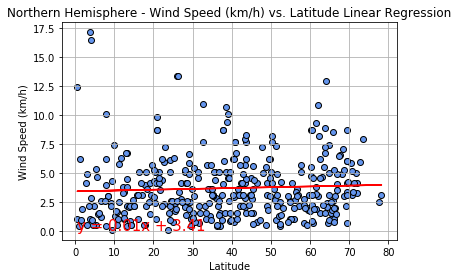

In [129]:
title = 'Northern Hemisphere - Wind Speed (km/h) vs. Latitude Linear Regression'
x_label = 'Latitude'
y_label = 'Wind Speed (km/h)'
regression_plot(northern_hem_df['Lat'], northern_hem_df['Wind Speed'], title, x_label, y_label)

####  Southern Hemisphere - Wind Speed (km/h)vs. Latitude Linear Regression

The r-squared is: 0.020851410509594225


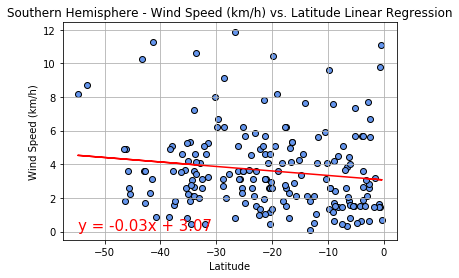

In [130]:
title = 'Southern Hemisphere - Wind Speed (km/h) vs. Latitude Linear Regression'
x_label = 'Latitude'
y_label = 'Wind Speed (km/h)'
regression_plot(southern_hem_df['Lat'], southern_hem_df['Wind Speed'], title, x_label, y_label)